In [1]:
%matplotlib inline
import numpy as np
from os import walk
from os.path import join
from sklearn.model_selection import train_test_split

In [2]:
from skimage import io

In [3]:
F = open("../UFPR-ALPR-dataset/training/track0008/track0008[18].txt")

In [4]:
cords = F.readlines()

In [5]:
print(cords)
position = cords[7][:-1]
print(position.split(" "))
y = int(position.split(" ")[2])
x = int(position.split(" ")[1])
h = int(position.split(" ")[4])
w = int(position.split(" ")[3])
ya = list((y, x, h, w))
print(ya)

['camera: GoPro Hero4 Silver\n', 'position_vehicle: 743 307 285 245\n', '\ttype: car\n', '\tmake: Peugeot\n', '\tmodel: 206\n', '\tyear: 2008\n', 'plate: AQU-9177\n', 'position_plate: 862 422 77 25\n', '\tchar 1: 867 430 9 14\n', '\tchar 2: 876 430 9 13\n', '\tchar 3: 886 430 8 13\n', '\tchar 4: 899 431 9 12\n', '\tchar 5: 911 431 3 13\n', '\tchar 6: 916 431 9 13\n', '\tchar 7: 925 431 9 13']
['position_plate:', '862', '422', '77', '25']
[422, 862, 25, 77]


/home/sagacius/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/sagacius/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


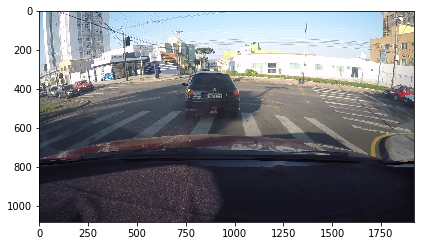

In [6]:
im = io.imread("../UFPR-ALPR-dataset/training/track0008/track0008[18].png")
io.imshow(im);

/home/sagacius/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/sagacius/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


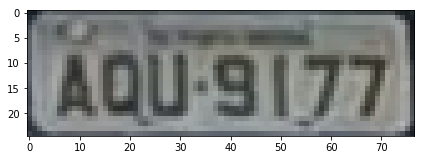

In [7]:
io.imshow(im[y:y+h, x:x+w]);

## Training

In [8]:
x = []
y = []
for root, dirs, files in walk("../UFPR-ALPR-dataset/training/"):
    for name in files:
        path = str(join(root, name))
        if path.endswith(".png"):
            pathtxt = path.replace(".png", ".txt")
            F = open(pathtxt)
            cords = F.readlines()
            position = cords[7][:-1]
            a = int(position.split(" ")[2])
            b = int(position.split(" ")[1])
            h = int(position.split(" ")[4])
            w = int(position.split(" ")[3])
            x.append(path)
            y.append((a, b, h, w))

In [9]:
print(len(x), len(y))

1800 1800


In [10]:
x_train = np.asarray(x)
y_train = np.asarray(y)

In [11]:
print(x_train[0], y_train[0])

../UFPR-ALPR-dataset/training/track0008/track0008[21].png [428 860  26  78]


In [12]:
np.save("../Cache/LicensePlateDetection/x_train.npy", x_train)
np.save("../Cache/LicensePlateDetection/y_train.npy", y_train)

## Validation

In [13]:
x = []
y = []
for root, dirs, files in walk("../UFPR-ALPR-dataset/validation/"):
    for name in files:
        path = str(join(root, name))
        if path.endswith(".png"):
            pathtxt = path.replace(".png", ".txt")
            F = open(pathtxt)
            cords = F.readlines()
            position = cords[7][:-1]
            a = int(position.split(" ")[2])
            b = int(position.split(" ")[1])
            h = int(position.split(" ")[4])
            w = int(position.split(" ")[3])
            x.append(path)
            y.append((a, b, h, w))
x_validation = np.asarray(x)
y_validation = np.asarray(y)
np.save("../Cache/LicensePlateDetection/x_validation.npy", x_validation)
np.save("../Cache/LicensePlateDetection/y_validation.npy", y_validation)

## Test

In [14]:
x = []
y = []
for root, dirs, files in walk("../UFPR-ALPR-dataset/testing/"):
    for name in files:
        path = str(join(root, name))
        if path.endswith(".png"):
            pathtxt = path.replace(".png", ".txt")
            F = open(pathtxt)
            cords = F.readlines()
            position = cords[7][:-1]
            a = int(position.split(" ")[2])
            b = int(position.split(" ")[1])
            h = int(position.split(" ")[4])
            w = int(position.split(" ")[3])
            x.append(path)
            y.append((a, b, h, w))
x_test = np.asarray(x)
y_test = np.asarray(y)
np.save("../Cache/LicensePlateDetection/x_test.npy", x_test)
np.save("../Cache/LicensePlateDetection/y_test.npy", y_test)

In [15]:
print(x_train.shape, x_validation.shape, x_test.shape)

(1800,) (900,) (1800,)


In [16]:
print(y_train.shape, y_validation.shape, y_test.shape)

(1800, 4) (900, 4) (1800, 4)
